### Lemon Quality Detection


In [2]:
# import libraries
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [4]:
image_size =300
batch_size = 32

In [6]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    seed = 123,
    shuffle = True,
    batch_size = batch_size,
    image_size = (image_size,image_size),
    
)
    
    
    


Found 2528 files belonging to 3 classes.


In [18]:
class_names = dataset.class_names

In [12]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch)

(32, 300, 300, 3)
tf.Tensor([2 1 1 2 0 2 0 0 2 2 2 0 1 2 2 2 0 2 2 2 2 2 2 2 0 2 1 0 0 2 0 0], shape=(32,), dtype=int32)


In [13]:
len(dataset)

79

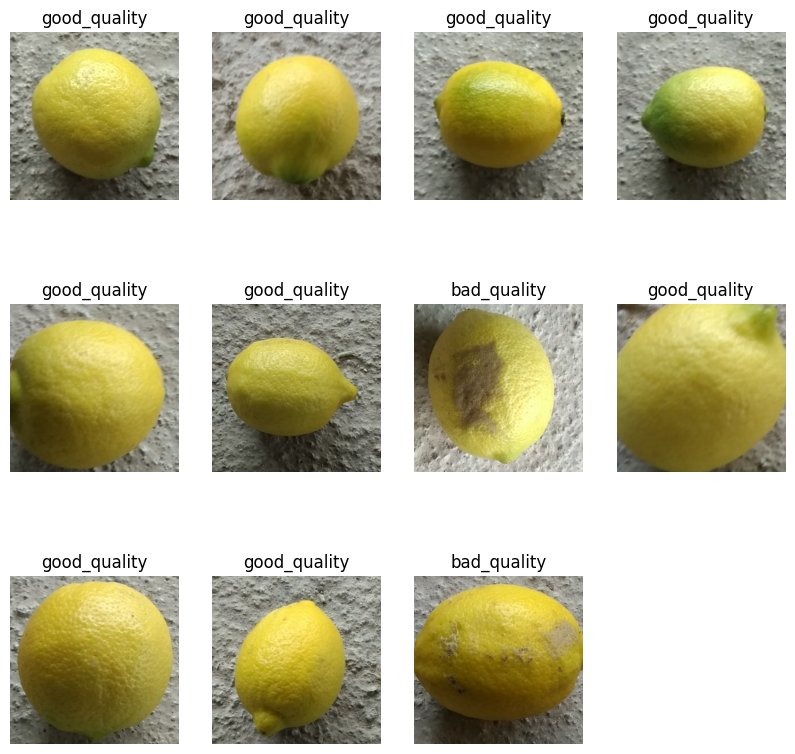

In [24]:
plt.figure(figsize = (10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(11):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [30]:
# test and train

def split_dataset(dataset,train_split = 0.8 ,test_split =0.1 , val_split = 0.1 , shuffle = True , shuffle_size = 10000):
    assert ( train_split + test_split+ val_split) == 1
    ds_size = len(dataset)
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed =12)
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)

    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip (train_size).skip(val_size)
    return train_ds, test_ds, val_ds
                  

In [31]:
train_ds, test_ds, val_ds = split_dataset(dataset)

In [32]:
len(train_ds)

63

In [33]:
len(test_ds)

9

In [34]:
len(val_ds)

7